<a href="https://colab.research.google.com/github/Hritesh-Moitra/Hritesh-Moitra/blob/main/Capstoneprojectpyspark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pyspark ##installing pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 40 kB/s 
     |████████████████████████████████| 199 kB 33.8 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=fa3ba7a9afc3ebe900ba511b482b7e3039226362ffd1a844ac9d6b5fe882a62b
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


In [ ]:
#Initializing PySpark
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
# #Spark Config
conf = SparkConf().setAppName("sample_app")
sc = SparkContext(conf=conf)
spark = SparkSession.builder.appName('Test').getOrCreate()
sqlContext = SQLContext(sc)

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:114: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning,


In [ ]:
# Write PySpark code to read olympics_data.csv file
olymp_data = spark.read.format("csv").option("header","true").option("inferSchema","true").load("/content/olympix_data_organized_with_header (1) (1).csv")
olymp_data.show()

+--------------------+---+-------------+----+----------+--------------------+----------+------------+-----------+-----------+
|                name|age|      country|year|Date_Given|              sports|gold_medal|silver_medal|brone_medal|total_medal|
+--------------------+---+-------------+----+----------+--------------------+----------+------------+-----------+-----------+
|      Michael Phelps| 23|United States|2008| 8/24/2008|            Swimming|         8|           0|          0|          8|
|      Michael Phelps| 19|United States|2004| 8/29/2004|            Swimming|         6|           0|          2|          8|
|      Michael Phelps| 27|United States|2012|08-12-2012|            Swimming|         4|           2|          0|          6|
|    Natalie Coughlin| 25|United States|2008| 8/24/2008|            Swimming|         1|           2|          3|          6|
|       Aleksey Nemov| 24|       Russia|2000|10-01-2000|          Gymnastics|         2|           1|          3|     

In [ ]:
## Printing the different sports present in the dataset

list_of_different_sports=olymp_data.select('sports').distinct() ##selecting the distinct sports present in the dataset.
list_of_different_sports.show() ##displaying the result.

+--------------------+
|              sports|
+--------------------+
|          Gymnastics|
|              Tennis|
|              Boxing|
|Short-Track Speed...|
|          Ice Hockey|
|              Rowing|
|                Judo|
|            Softball|
|             Sailing|
|            Swimming|
|       Alpine Skiing|
|          Basketball|
|            Handball|
| Rhythmic Gymnastics|
|            Biathlon|
|           Triathlon|
|           Badminton|
|           Athletics|
|      Figure Skating|
|    Beach Volleyball|
+--------------------+
only showing top 20 rows



In [ ]:
##showing the total number of medals in each sport

total_medals_in_each_sport=olymp_data.groupBy('sports').sum('total_medal')
total_medals_in_each_sport=total_medals_in_each_sport.withColumnRenamed('sum(total_medal)','Total Medals')
total_medals_in_each_sport.show()

+--------------------+------------+
|              sports|Total Medals|
+--------------------+------------+
|          Gymnastics|         282|
|              Tennis|          78|
|              Boxing|         188|
|Short-Track Speed...|         138|
|          Ice Hockey|         384|
|              Rowing|         576|
|                Judo|         224|
|            Softball|         134|
|             Sailing|         210|
|            Swimming|         765|
|       Alpine Skiing|          90|
|          Basketball|         287|
|            Handball|         351|
| Rhythmic Gymnastics|          84|
|            Biathlon|         138|
|           Triathlon|          24|
|           Badminton|          96|
|           Athletics|         753|
|      Figure Skating|          54|
|    Beach Volleyball|          48|
+--------------------+------------+
only showing top 20 rows



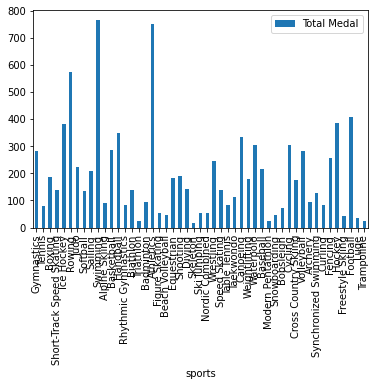

In [ ]:
##plotting a graph for total number of medals in each sport.

import matplotlib.pyplot as plt
res = olymp_data.groupBy("sports").sum('total_medal')
res = res.withColumnRenamed("sum(total_medal)","Total Medal")
get_Pandas_DF = res.toPandas() # we can use toPandas() for converting pyspark dataframe to Pandas dataframe
get_Pandas_DF
get_Pandas_DF.plot.bar(x='sports',y='Total Medal')
plt.show()

In [ ]:
##Now , sorting the results on the basis of results
import pyspark.sql.functions as f ##importing the sql functions from pyspark session.
res.orderBy(f.desc("Total Medal")).show() # sorting the res dataframe in descending order on the basis of Total_medals using orderBy function.

+----------+-----------+
|    sports|Total Medal|
+----------+-----------+
|  Swimming|        765|
| Athletics|        753|
|    Rowing|        576|
|  Football|        407|
|    Hockey|        388|
|Ice Hockey|        384|
|  Handball|        351|
|  Canoeing|        333|
| Waterpolo|        306|
|   Cycling|        306|
|Basketball|        287|
|Gymnastics|        282|
|Volleyball|        281|
|   Fencing|        256|
| Wrestling|        245|
|      Judo|        224|
|  Baseball|        216|
|   Sailing|        210|
|  Shooting|        192|
|    Boxing|        188|
+----------+-----------+
only showing top 20 rows



In [ ]:
##total number of medals won by each country in swimming.

res=olymp_data.select('country','total_medal').where(olymp_data['sports']=='Swimming')
res.groupBy('country').sum('total_medal').show()

+-------------+----------------+
|      country|sum(total_medal)|
+-------------+----------------+
|       Russia|              20|
|       Sweden|               9|
|      Germany|              32|
|       France|              39|
|     Slovakia|               2|
|    Argentina|               1|
|Great Britain|              11|
|United States|             267|
|        China|              35|
|      Belarus|               2|
|      Croatia|               1|
|        Italy|              16|
|    Lithuania|               1|
|       Norway|               2|
|        Spain|               3|
|      Denmark|               1|
|      Ukraine|               7|
|  South Korea|               4|
|     Zimbabwe|               7|
|      Tunisia|               3|
+-------------+----------------+
only showing top 20 rows



In [ ]:
##total number of medals won by each country in skeleton.

res=olymp_data.select('country','total_medal').where(olymp_data['sports']=='Skeleton')

res.groupBy('country').sum('total_medal').show()

+-------------+----------------+
|      country|sum(total_medal)|
+-------------+----------------+
|       Russia|               1|
|      Germany|               2|
|Great Britain|               3|
|United States|               3|
|  Switzerland|               3|
|       Latvia|               1|
|       Canada|               4|
|      Austria|               1|
+-------------+----------------+



In [ ]:
##Total number of medals that US won yearly.

res=olymp_data.select('year','total_medal').where(olymp_data['country']=='United States')
res.groupBy('year').sum('total_medal').show()

+----+----------------+
|year|sum(total_medal)|
+----+----------------+
|2006|              52|
|2004|             265|
|2012|             254|
|2000|             243|
|2010|              97|
|2008|             317|
|2002|              84|
+----+----------------+



In [ ]:
res=olymp_data.groupBy('country').sum('total_medal')
res = res.withColumnRenamed("sum(total_medal)","Total Medal")
res.show()

+--------------+-----------+
|       country|Total Medal|
+--------------+-----------+
|        Russia|        768|
|      Paraguay|         17|
|Chinese Taipei|         20|
|        Sweden|        181|
|       Eritrea|          1|
|     Singapore|          7|
|      Malaysia|          3|
|        Turkey|         28|
|       Germany|        629|
|   Afghanistan|          2|
|         Sudan|          1|
|        France|        318|
|        Greece|         59|
|     Sri Lanka|          1|
|       Algeria|          8|
|          Togo|          1|
|      Slovakia|         35|
|     Argentina|        141|
|       Belgium|         18|
| Great Britain|        322|
+--------------+-----------+
only showing top 20 rows



In [ ]:
##finding out the max age of athlete
res=olymp_data.agg({"age": "max"})
res.show()

+--------+
|max(age)|
+--------+
|      61|
+--------+



In [ ]:
##finding out the country and name of the oldest athlete

res=olymp_data.select('name','country').where(olymp_data['age']==61)
res.show()

+----------+-------+
|      name|country|
+----------+-------+
|Ian Millar| Canada|
+----------+-------+

